In [1]:
#import fwiVis.fwiVis as fv
import s3fs
s3 = s3fs.S3FileSystem(anon=False)
from math import cos, asin, sqrt
import re

import numpy as np
import geopandas as gpd
import pandas as pd
from matplotlib import pyplot as plt
import os
import rioxarray as rio
import xarray as xr
import rasterio
import glob
from shapely.errors import ShapelyDeprecationWarning
from shapely.geometry import Point
import warnings
import folium
import datetime
import time
from folium import plugins
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 
warnings.filterwarnings("ignore", category=ShapelyDeprecationWarning) 
import contextily as cx
from shapely.geometry import box
import sys
from datetime import datetime, timedelta
from itertools import chain

from datetime import date


sys.path.insert(0, '/projects/old_shared/fire_weather_vis/base-fwi-vis/')
import fwiVis.fwiVis as fv

In [2]:
cwfis_perims = gpd.read_file("/projects/old_shared/fire_weather_vis/Lightning_analysis/CWFIS/perim_progression/progression.shp")

In [19]:
#cwfis_perims = cwfis_perims.set_crs("EPSG:4326")


In [20]:
cwfis_perims[1:4].explore()

In [6]:
cwfis_perims.columns

Index(['CLUSTERID', 'DATE', 'AREA', 'C_AREA', 'FWI', 'CONSIS_ID', 'geometry',
       'log_area', 'better_format_date', 'better_format_date2'],
      dtype='object')

In [3]:
import seaborn as sn

In [4]:
cwfis_perims.DATE

0        20230419.0
1        20230420.0
2        20230428.0
3        20230428.0
4        20230803.0
            ...    
12535    20231004.0
12536    20231009.0
12537    20231009.0
12538    20231009.0
12539    20231009.0
Name: DATE, Length: 12540, dtype: float64

[Text(0.5, 23.52222222222222, ''), Text(50.722222222222214, 0.5, '')]

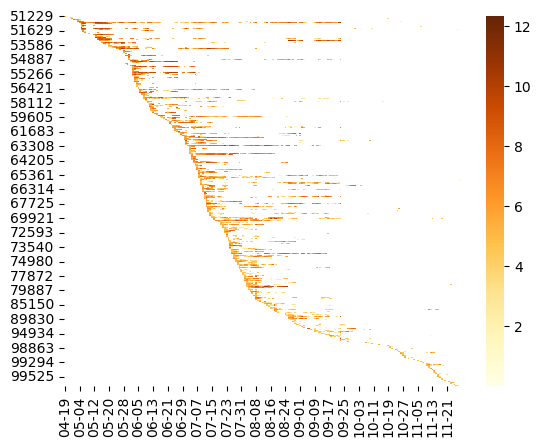

In [5]:
cwfis_perims["log_area"] = np.log(cwfis_perims.AREA)
cwfis_perims["better_format_date"] = pd.to_datetime(cwfis_perims.DATE.astype("str"), format="%Y%m%d.0")
#cwfis_perims.DATE = cwfis_perims.DATE.astype("datetime64[ns]")
cwfis_perims["better_format_date2"] = cwfis_perims["better_format_date"].astype("datetime64[ns]").dt.strftime("%m-%d")

heat = cwfis_perims[["CONSIS_ID", "log_area", "better_format_date2"]].pivot(index="CONSIS_ID", columns="better_format_date2", values="log_area")
ax = sn.heatmap(heat, cmap = "YlOrBr")
ax.set(xlabel="", ylabel="")

[Text(0.5, 23.52222222222222, ''), Text(50.722222222222214, 0.5, '')]

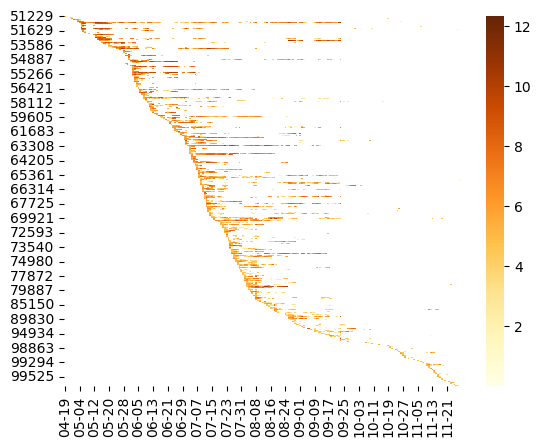

In [20]:
### Sort by lattitude 

cwfis_perims["x_component"] = cwfis_perims.geometry.centroid.x
cwfis_perims["y_component"] = cwfis_perims.geometry.centroid.y

cwfis_perims = cwfis_perims.sort_values(by = "y_component")



cwfis_perims["log_area"] = np.log(cwfis_perims.AREA)
cwfis_perims["better_format_date"] = pd.to_datetime(cwfis_perims.DATE.astype("str"), format="%Y%m%d.0")
#cwfis_perims.DATE = cwfis_perims.DATE.astype("datetime64[ns]")
cwfis_perims["better_format_date2"] = cwfis_perims["better_format_date"].astype("datetime64[ns]").dt.strftime("%m-%d")

heat = cwfis_perims[["CONSIS_ID", "log_area", "better_format_date2", "y_component"]].pivot(index="CONSIS_ID", columns="better_format_date2", values="log_area")
ax = sn.heatmap(heat, cmap = "YlOrBr")
ax.set(xlabel="", ylabel="")

In [21]:
heat.sort_values()

better_format_date2,04-19,04-20,04-28,04-29,04-30,05-01,05-02,05-03,05-04,05-05,...,11-19,11-20,11-21,11-22,11-23,11-24,11-25,11-26,11-27,11-28
CONSIS_ID,,,,,,,,,,,,,,,,,,,,,
51229,5.200545,1.609854,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51231,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51234,NaN,NaN,5.954671,6.501796,4.996624,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51235,NaN,NaN,6.027020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
51243,NaN,NaN,NaN,4.879159,2.827189,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99687,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.201476,NaN,NaN,2.833460
99691,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.636927,3.025626,NaN,NaN
99692,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.678208,NaN,NaN,NaN


In [22]:
cwfis_perims

,CLUSTERID,DATE,AREA,C_AREA,FWI,CONSIS_ID,geometry,log_area,better_format_date,better_format_date2,x_component,y_component
4179,56928,20230607.0,3087.0000,4639.900,36.0,56414,"POLYGON ((975474.289 -170892.284, 975492.767 -...",8.034955,2023-06-07,06-07,9.778659e+05,-1.718501e+05
1351,57070,20230608.0,870.9940,5513.150,19.0,56414,"MULTIPOLYGON (((974596.847 -172498.470, 974608...",6.769635,2023-06-08,06-08,9.769045e+05,-1.718199e+05
3893,57588,20230609.0,153.3910,5667.410,23.0,56414,"MULTIPOLYGON (((974361.971 -172466.051, 974439...",5.032990,2023-06-09,06-09,9.753364e+05,-1.688131e+05
2207,56654,20230606.0,1168.5500,1550.380,23.0,56414,"POLYGON ((976498.853 -167616.089, 976441.919 -...",7.063519,2023-06-06,06-06,9.783614e+05,-1.680826e+05
1716,57820,20230610.0,67.3019,860.020,23.0,56927,"POLYGON ((1014059.508 -169099.098, 1013909.996...",4.209188,2023-06-10,06-10,1.013636e+06,-1.674590e+05
...,...,...,...,...,...,...,...,...,...,...,...,...
7933,76104,20230730.0,96.6832,262.311,17.0,75548,"POLYGON ((-1707426.645 2682155.419, -1707296.3...",4.571440,2023-07-30,07-30,-1.706616e+06,2.681887e+06
4383,75548,20230729.0,164.9240,164.924,19.0,75548,"POLYGON ((-1707132.459 2682545.956, -1707247.0...",5.105485,2023-07-29,07-29,-1.706257e+06,2.682487e+06
3840,77319,20230801.0,25.9636,222.939,13.0,76097,"POLYGON ((-1615873.057 2690292.492, -1615845.4...",3.256696,2023-08-01,08-01,-1.615384e+06,2.690793e+06
10086,76778,20230731.0,43.7048,196.666,7.0,76097,"POLYGON ((-1615823.560 2691609.021, -1615822.0...",3.777458,2023-07-31,07-31,-1.615345e+06,2.691180e+06
